In [423]:
import pandas

In [10]:
!pip install yfinance

  Using cached yfinance-0.2.51-py2.py3-none-any.whl (104 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     -------------------------------------- 948.2/948.2 kB 9.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=f7da9a3a46b0e63e6e6f4fe2c7ad1f872ffe89c0601d3d043e3123fcfa307252
  Stored in directory: c:\users\shedrack\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b8bd6a407a1
Successfully built peewe

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [174]:
!pip install pmdarima

     ------------------------------------- 615.0/615.0 kB 15.4 kB/s eta 0:00:00


In [278]:
import yfinance as yf

# Define the cryptocurrency ticker
crypto_ticker = "SOL-USD"  
start_date = "2020-01-01"  
end_date = "2025-01-01"    

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

print(data.head())

data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker       SOL-USD   SOL-USD   SOL-USD   SOL-USD   SOL-USD
Date                                                        
2020-04-10  0.951054  1.313487  0.694187  0.832005  87364276
2020-04-11  0.776819  1.049073  0.765020  0.951054  43862444
2020-04-12  0.882507  0.956670  0.762426  0.785448  38736897
2020-04-13  0.777832  0.891603  0.773976  0.890760  18211285
2020-04-14  0.661925  0.796472  0.628169  0.777832  16747614
Data saved to crypto_data.csv


In [674]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [675]:
sns.set_style('darkgrid')
# Set the color palette to use
colors = ["#48A9A6", "#071010", "#000000"]
sns.set_palette(sns.color_palette(colors))


In [812]:
df = pd.read_csv('BTC-USD.csv')
# df.drop(index=[0,1], inplace=True)
df = df.iloc[2:]


In [813]:
df.tail()

,Price,Close,High,Low,Open,Volume
1824,2024-12-27,94164.859375,97294.84375,93310.7421875,95704.9765625,52419934565
1825,2024-12-28,95163.9296875,95525.8984375,94014.2890625,94160.1875,24107436185
1826,2024-12-29,93530.2265625,95174.875,92881.7890625,95174.0546875,29635885267
1827,2024-12-30,92643.2109375,94903.3203125,91317.1328125,93527.1953125,56188003691
1828,2024-12-31,93429.203125,96090.6015625,91914.03125,92643.25,43625106843


In [814]:
df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [815]:
df.set_index('Date', inplace=True)

In [816]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032
2020-01-04,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275
2020-01-05,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095


In [817]:
df[['Close','Open','Low','High','Volume']] = df[['Close','Open','Low','High','Volume']].astype('float')

In [818]:
df['Daily Return'] = df['Close'].pct_change() #percentage change 

In [819]:
df.head()

,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,1.856566e+10,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,2.080208e+10,-0.029819
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,2.811148e+10,0.051452
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,1.844427e+10,0.008955
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,1.972507e+10,0.000089


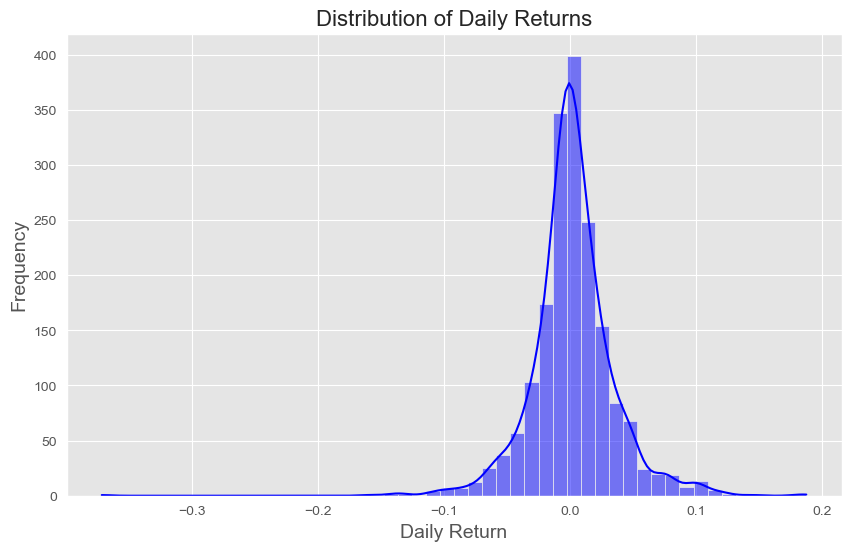

In [820]:
#analysing daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [821]:
df['Rolling std'] = df['Close'].rolling(window=30).std()

<AxesSubplot:>

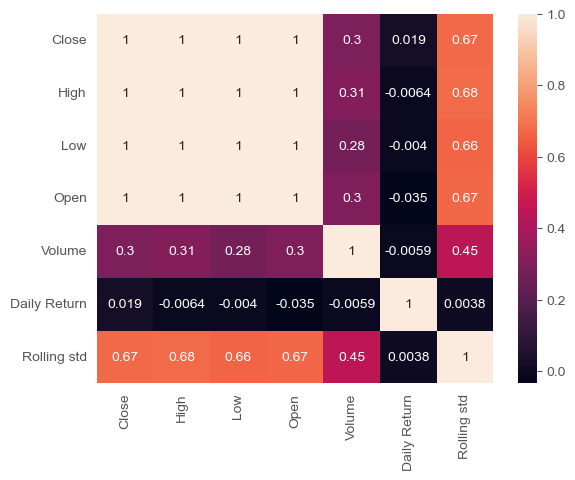

In [822]:
sns.heatmap(df.corr(), annot=True)

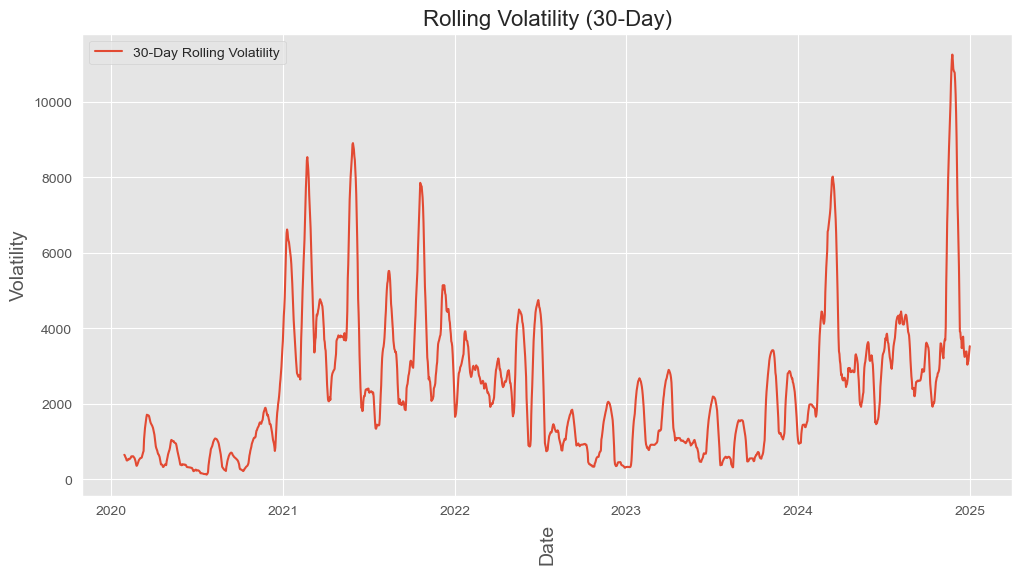

In [823]:
# Rolling volatility (30-day rolling standard deviation)
df['Rolling Std'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling Std'], label='30-Day Rolling Volatility')
plt.title('Rolling Volatility (30-Day)', fontsize=16)
plt.xlabel('Date', fontsize=14,rotation=90)
plt.ylabel('Volatility', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

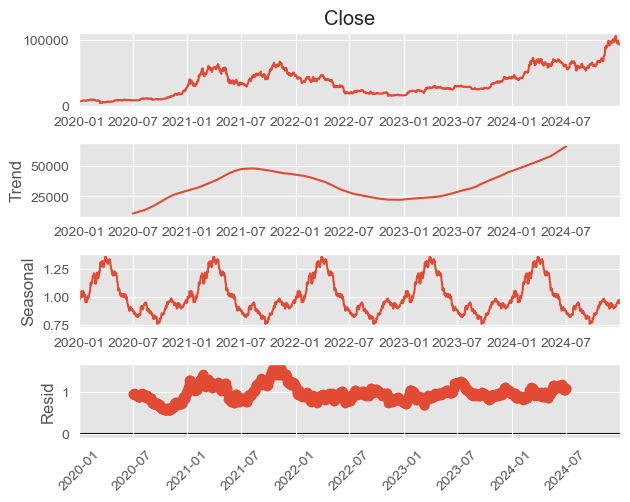

In [824]:
# Seasonal decomposition
decompose_result = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=365)
decompose_result.plot()
plt.xticks(rotation='45')
plt.show()

In [825]:
# convert to datetime index
df.index = pd.to_datetime(df.index)

In [826]:
#resampling data to monthly average
df_avg = df[['Close', 'High', 'Low', 'Open', 'Volume']].resample('W').mean()
colors = sns.color_palette("hls", 8)

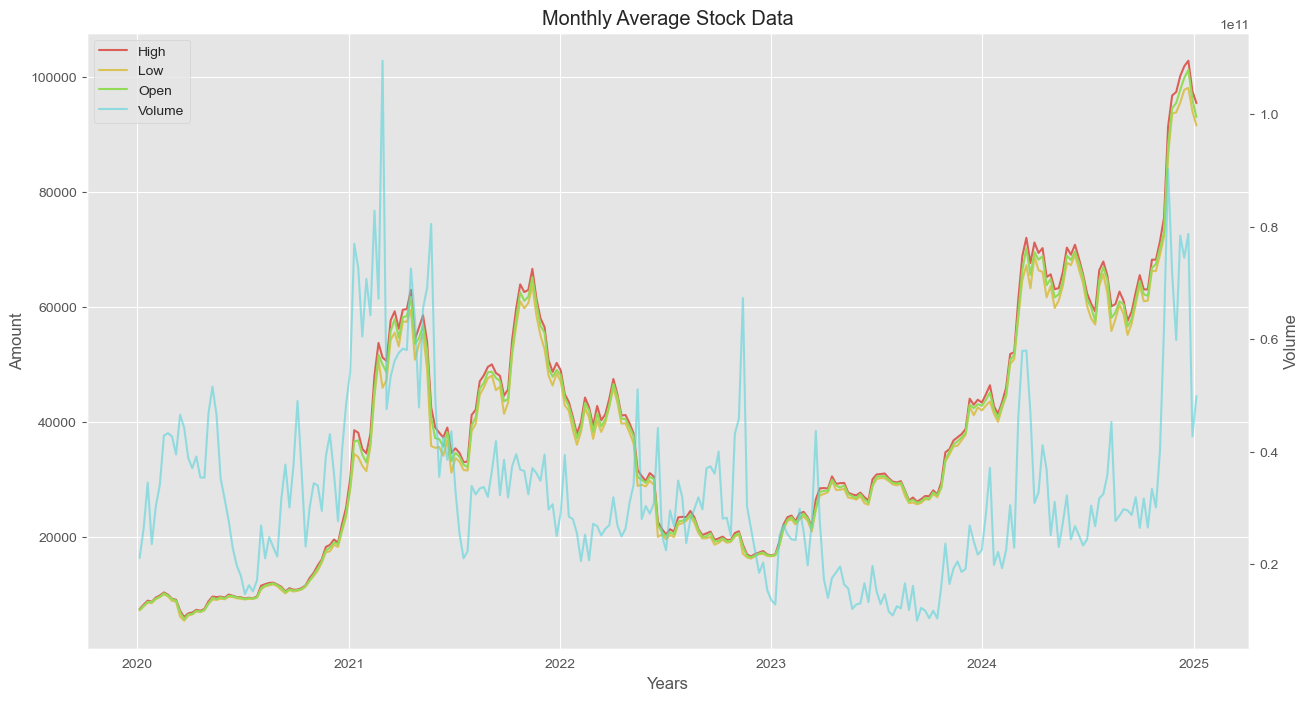

In [827]:
plt.figure(figsize=(15,8))
plt.plot(df_avg.index, df_avg['High'], color=colors[0], label='High')
plt.plot(df_avg.index, df_avg['Low'], color=colors[1], label='Low')
plt.plot(df_avg.index, df_avg['Open'], color=colors[2], label='Open')

# use sec y-axis for volumn
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_avg.index, df_avg['Volume'], color=colors[4], label='Volume', alpha=0.6)

# Set labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Amount')
ax2.set_ylabel('Volume')

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.title('Monthly Average Stock Data')
plt.style.use('ggplot')
plt.grid(visible=False)
plt.show()

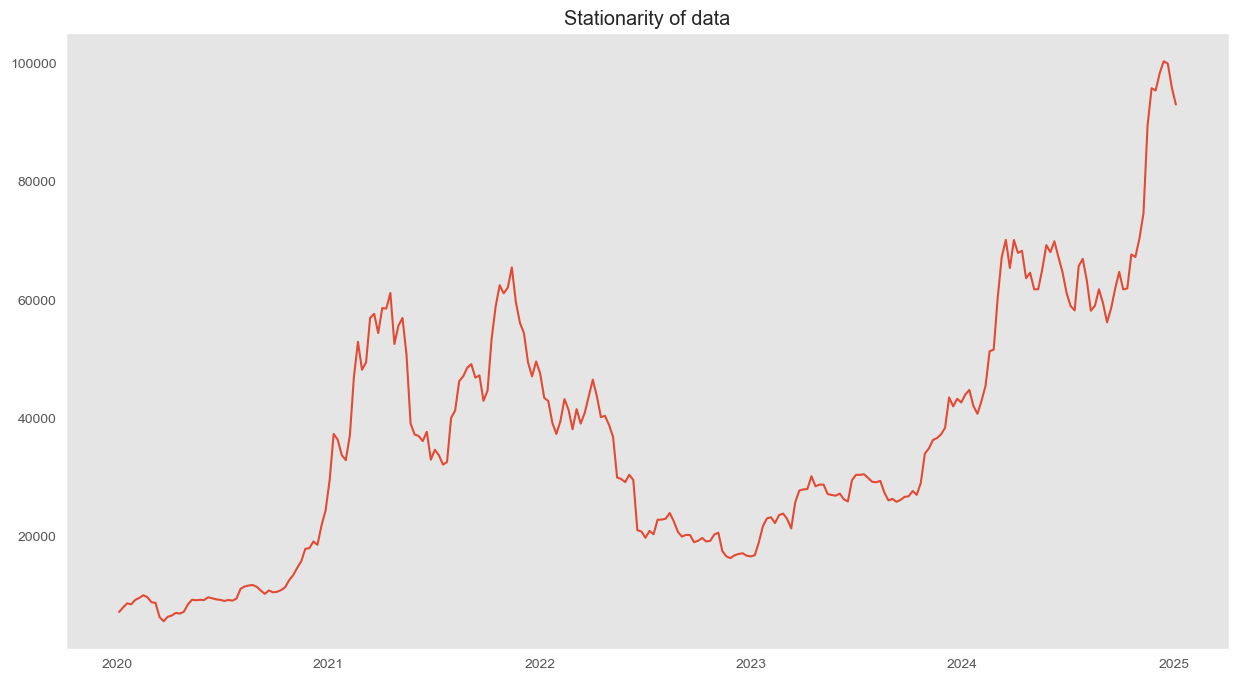

In [828]:
#checking if the data is stationary
# first by visualizing and by ADF test

check = pd.DataFrame(df_avg['Close'] )
plt.figure(figsize=(15,8))
plt.title('Stationarity of data')
plt.plot(check)
plt.grid(visible=False)
plt.style.use('ggplot')

In [829]:
#ADF test
from statsmodels.tsa.stattools import adfuller as ad

check2 = ad(df_avg['Close'])
print('ADF Statistics for Close Prices')
print(f"ADF Statistic: {check2[0]}", '\n')
print(f"p-value: {check2[1]}", '\n')
for i,j in check2[4].items():
    print('Critical Values')
    print(f'    {i},     {j}')


ADF Statistics for Close Prices
ADF Statistic: -1.1639238926929043 

p-value: 0.6889191204457071 

Critical Values
    1%,     -3.4560535712549925
Critical Values
    5%,     -2.8728527662442334
Critical Values
    10%,     -2.5727985212493754


- Since p-value is greater than 5%, failed to reject the null hypothesis
- Since the ADF statistic is greater than critial values, the data is non-stationary


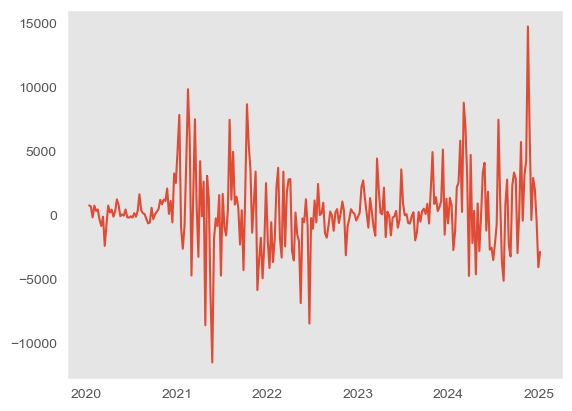

In [830]:
#attempt to make data stationay by log transforming then differencing  

diff = pd.DataFrame(df_avg['Close'] - df_avg['Close'].shift(1))
plt.plot(diff)
plt.grid(visible=False)
plt.style.use('ggplot')

Autocorrelation 

correlation of a time series with its own past values.

1. Autocorrelation Function (ACF):

Shows autocorrelations at various lags.
A plot of the ACF (called the ACF plot) is a common way to visualize autocorrelation.


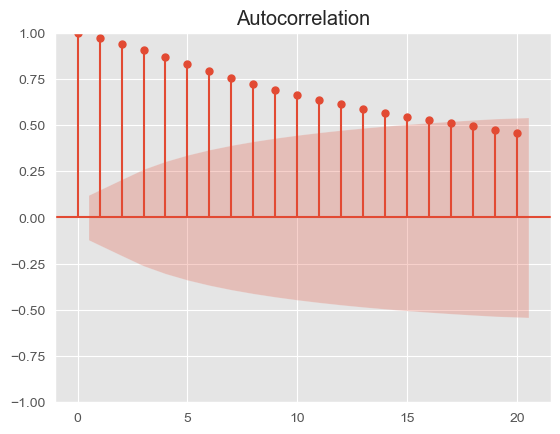

In [831]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_avg['Close'], lags=20)
plt.show()

2. Partial Autocorrelation Function (PACF):

Measures the correlation of a series with its lags after removing the effects of intermediate lags.
Useful for identifying the order of the autoregressive (AR) component in models.


c:\Users\Shedrack\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


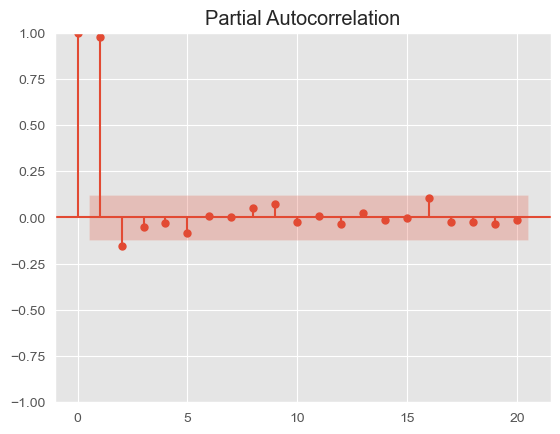

In [832]:
plot_pacf(df_avg['Close'], lags=20)
plt.show()

In [833]:
from pmdarima import auto_arima

model = auto_arima(df_avg['Close'], seasonal=True, m=12, 
                   trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4903.977, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4916.184, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4902.930, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4902.636, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4917.393, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4900.894, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=4902.583, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=4904.244, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=4902.641, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=4902.642, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4901.349, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=4901.220, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=4900.897, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12] intercept
Total fit time: 1.928 seconds
        

In [834]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data
train_size = int(len(df_avg) * 0.8)
train, test = df_avg['Close'][:train_size], df_avg['Close'][train_size:]


In [835]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(0, 1, 1) model
model = ARIMA(train, order=(0, 1, 1))
model_fit = model.fit()


In [836]:
# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Evaluate forecast vs. actual values
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 790864762.8231533
Mean Absolute Error: 23998.827977490422
Root Mean Squared Error: 28122.317877855538


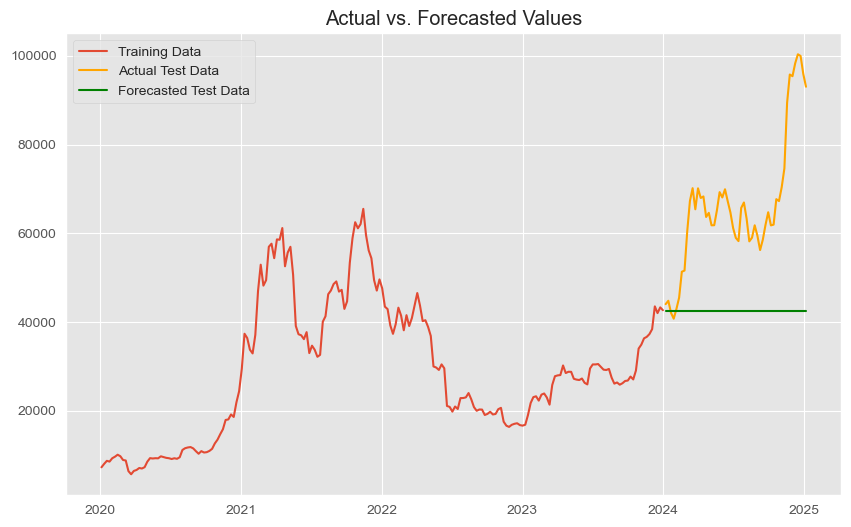

In [837]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Actual Test Data", color='orange')
plt.plot(test.index, forecast, label="Forecasted Test Data", color='green')
plt.legend()
plt.title("Actual vs. Forecasted Values")
plt.show()


In [838]:
train = df.iloc[:-365]
test = df.iloc[-365:]

In [839]:
# Reverting back to make 'Date' a regular column
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [840]:
train = train.rename(columns={'Date': 'ds', 'Close': 'y'})
test = test.rename(columns={'Date': 'ds', 'Close': 'y'})

In [841]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

In [842]:
model = Prophet()
model.add_regressor('Volume')
model.add_regressor('Open')

#optimization
#model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#model = Prophet(changepoint_prior_scale=0.1)  # Trying values between 0.01 and 0.5
#model = Prophet(n_changepoints=50)


In [843]:
def droping_cols(x):
    cols = ['High','Low','Daily Return','Rolling std','Rolling Std']
    for i in x.columns:
        if i in cols:
            x.drop(i, inplace=True,axis=1)

droping_cols(train)
droping_cols(test)
        

In [844]:
train

,ds,y,Open,Volume
0,2020-01-01,7200.174316,7194.892090,1.856566e+10
1,2020-01-02,6985.470215,7202.551270,2.080208e+10
2,2020-01-03,7344.884277,6984.428711,2.811148e+10
3,2020-01-04,7410.656738,7345.375488,1.844427e+10
4,2020-01-05,7411.317383,7410.451660,1.972507e+10
...,...,...,...,...
1457,2023-12-28,42627.855469,43468.199219,2.299209e+10
1458,2023-12-29,42099.402344,42614.644531,2.600002e+10
1459,2023-12-30,42156.902344,42091.753906,1.601393e+10
1460,2023-12-31,42265.187500,42152.097656,1.639750e+10


In [845]:
model.fit(train)

15:26:57 - cmdstanpy - INFO - Chain [1] start processing
15:26:57 - cmdstanpy - INFO - Chain [1] done processing


In [846]:
# Perform cross-validation
cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
metrics = performance_metrics(cv_results)


  0%|          | 0/3 [00:00<?, ?it/s]

15:26:59 - cmdstanpy - INFO - Chain [1] start processing
15:26:59 - cmdstanpy - INFO - Chain [1] done processing
15:26:59 - cmdstanpy - INFO - Chain [1] start processing
15:26:59 - cmdstanpy - INFO - Chain [1] done processing
15:27:00 - cmdstanpy - INFO - Chain [1] start processing
15:27:00 - cmdstanpy - INFO - Chain [1] done processing


In [847]:
print(metrics)

     horizon           mse         rmse          mae      mape     mdape  \
0    37 days  8.222570e+05   906.783856   603.100031  0.022171  0.015689   
1    38 days  8.107039e+05   900.390949   601.921638  0.021988  0.016215   
2    39 days  8.158738e+05   903.257327   605.478677  0.022084  0.016215   
3    40 days  8.365183e+05   914.613752   617.067564  0.022300  0.016397   
4    41 days  8.455521e+05   919.539089   620.558352  0.022305  0.016397   
..       ...           ...          ...          ...       ...       ...   
324 361 days  2.144344e+06  1464.357950  1216.471198  0.041999  0.042503   
325 362 days  2.121838e+06  1456.653092  1204.716726  0.041483  0.042503   
326 363 days  2.102359e+06  1449.951282  1194.620647  0.040886  0.041686   
327 364 days  2.069186e+06  1438.466503  1180.059415  0.040074  0.041671   
328 365 days  2.124835e+06  1457.681531  1190.868508  0.040011  0.041671   

        smape  coverage  
0    0.022358  0.944954  
1    0.022156  0.944954  
2    0.02

In [848]:
forecast = model.predict(test)

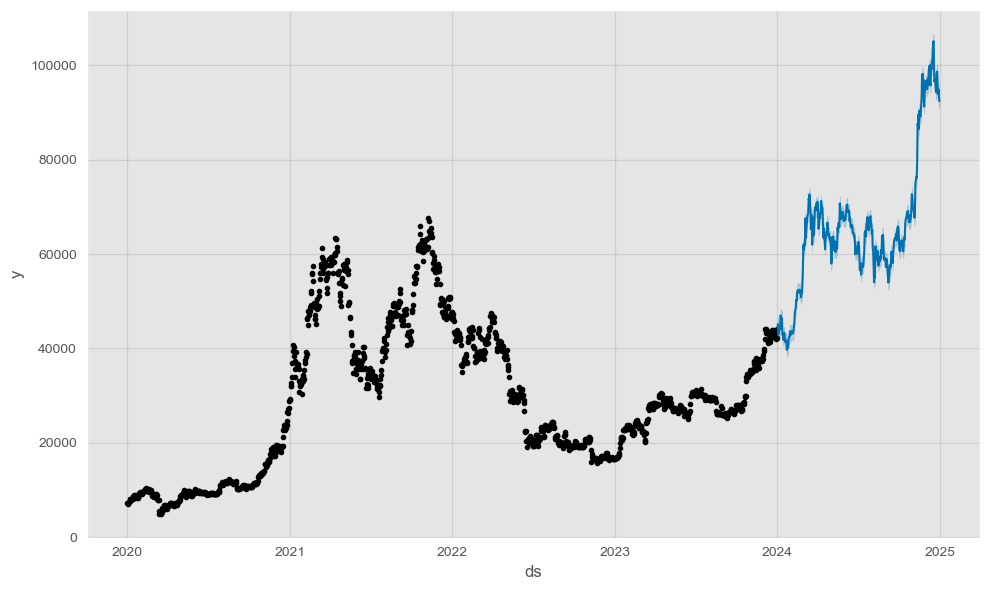

In [849]:
fig = model.plot(forecast)


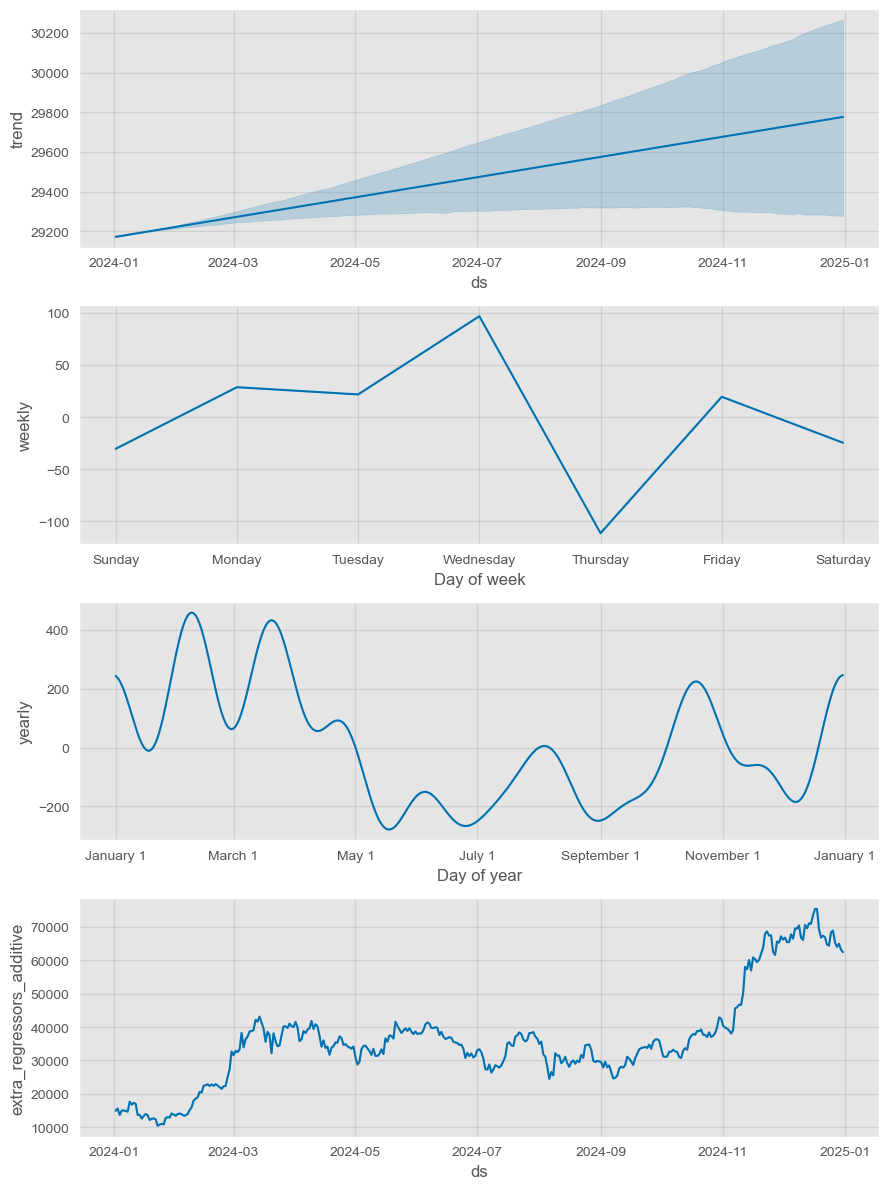

In [792]:
fig = model.plot_components(forecast)


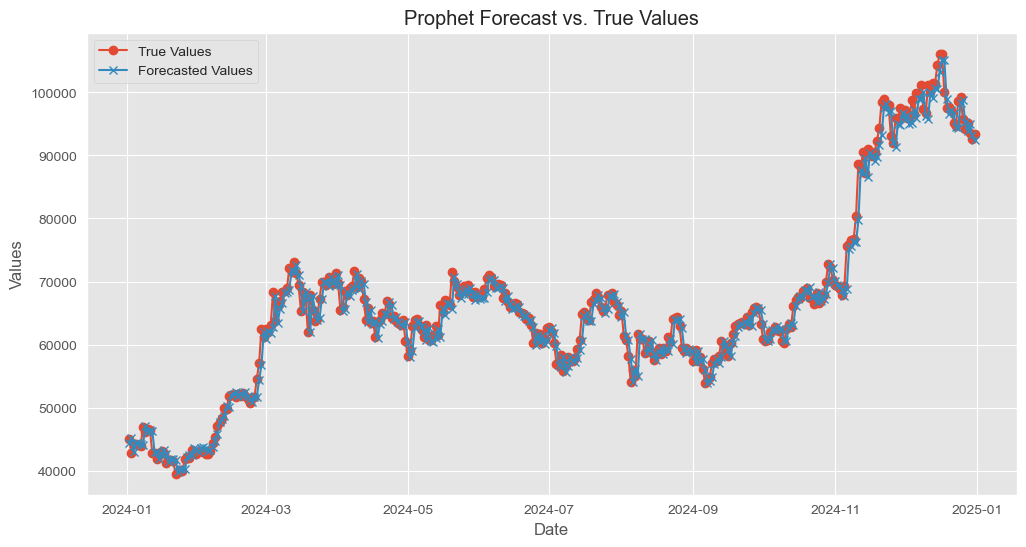

In [793]:
comparison = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds')


plt.figure(figsize=(12, 6))
plt.plot(comparison['ds'], comparison['y'], label='True Values', marker='o')
plt.plot(comparison['ds'], comparison['yhat'], label='Forecasted Values', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Prophet Forecast vs. True Values')
plt.legend()
plt.grid(True)
plt.show()

In [850]:
# Evaluate forecast vs. actual values
mse = mean_squared_error(test['y'], forecast['yhat'])
mae = mean_absolute_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 3606493.274956314
Mean Absolute Error: 1349.4315506450196
Root Mean Squared Error: 1899.0769534056049


In [851]:
from datetime import datetime
today = pd.DataFrame({
    'ds': [datetime.now()],  
    'Open': [101353.46], 
    'Volume': [74477568]  
})
forecast_today = model.predict(today)
print(forecast_today[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

                          ds           yhat    yhat_lower     yhat_upper
0 2025-01-17 15:27:46.266767  100988.386723  99665.745032  102516.285052


In [852]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Calculate MAPE
mape = mean_absolute_percentage_error(test['y'], forecast['yhat']) * 100

# Calculate R² score
r2 = r2_score(test['y'], forecast['yhat'])

print(f"Model Accuracy (1 - MAPE): {100 - mape:.2f}%")
print(f"R-squared Score: {r2:.4f}")

Model Accuracy (1 - MAPE): 97.97%
R-squared Score: 0.9832
